In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score

In [27]:
stock='AAPL'
df=yf.download(stock,start='2020-01-01',end='2024-12-31')[['Close']]
df.reset_index(inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close
Ticker,,AAPL
0,2020-01-02,72.620834
1,2020-01-03,71.914818
2,2020-01-06,72.487846
3,2020-01-07,72.146950
4,2020-01-08,73.307510


In [28]:
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

X = df[['Close']].values
y = df[['Target']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [29]:
model = LinearRegression()
model.fit(X_train,y_train)

import joblib
joblib.dump(model, 'stock_price_model.pkl')
print("✅ Model saved as stock_price_model.pkl")

✅ Model saved as stock_price_model.pkl


In [32]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test,predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean squared Error: {mse:.2f}')
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score (Accuracy): {r2:.4f}")

Mean squared Error: 8.48
Mean Squared Error (MSE): 8.48
R² Score (Accuracy): 0.9869


In [33]:
latest_close = df['Close'].iloc[-1].item()
import numpy as np
predicted_next = model.predict(np.array([[latest_close]]))[0].item()
print(f"latest Close: ${latest_close:.2f}")
print(f"Predicted NExt Day Close: ${predicted_next:.2f}")

latest Close: $254.97
Predicted NExt Day Close: $254.67


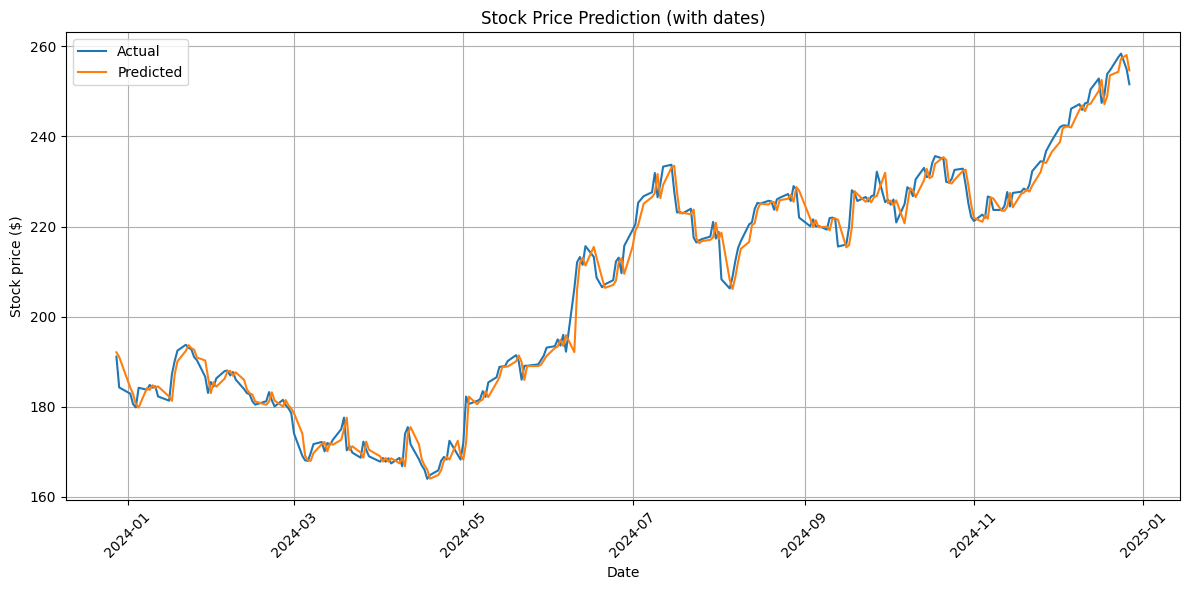

In [34]:
test_dates = df['Date'].iloc[-len(y_test):].values
plt.figure(figsize=(12,6))
plt.plot(test_dates,y_test,label='Actual')
plt.plot(test_dates,predictions,label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock price ($)')
plt.title('Stock Price Prediction (with dates)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()